In [1]:
import matplotlib.pyplot as plt
from math import *
import numpy as np
%matplotlib inline

In [2]:
xmax = 10.0
nx = 200
dx = xmax/(nx-1)
x = np.linspace(0,xmax,nx)
l = 20*dx
k = 2*pi / l
f = np.sin(k*x)

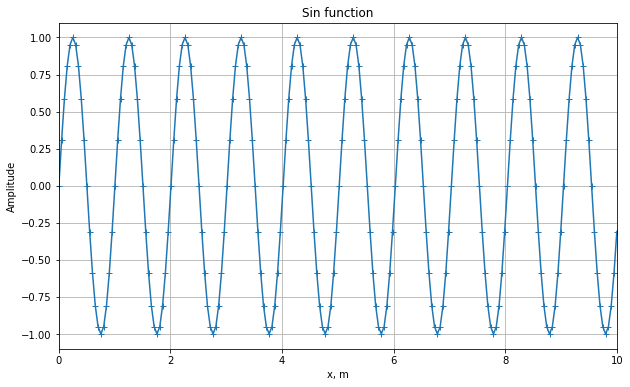

In [3]:
plt.figure(figsize=(10,6))
plt.plot(x, f,marker='+')
plt.title('Sin function')
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.xlim((0, xmax))
plt.grid()
plt.show()

In [4]:
nder = np.zeros(nx)
ader = np.zeros(nx)

for i in range(1, nx-1):
    nder[i] = (f[i + 1] - f[i - 1]) / (2 * dx)
    
ader = k * np.cos(k * x)
ader[0] = 0
ader[nx-1] = 0

rms = np.sqrt(np.mean(nder-ader)**2)

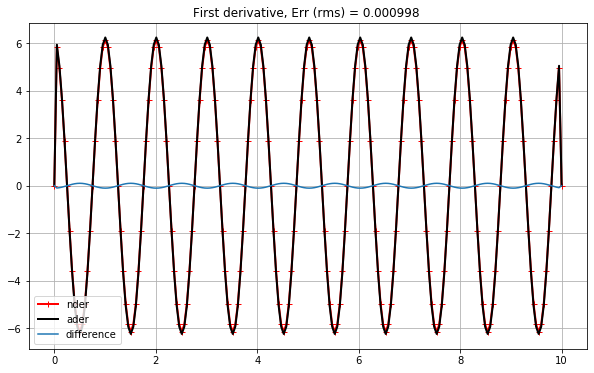

In [5]:
plt.figure(figsize=(10,6))
plt.plot(x,nder,label='nder',lw='2',color='red',marker='+')
plt.plot(x,ader,label='ader',lw='2',color='black')
plt.plot(x,nder-ader,label='difference')
plt.title("First derivative, Err (rms) = %.6f " % (rms) )
plt.grid()
plt.legend()
plt.show()

In [6]:
nmin=3
nmax=16
na = np.zeros(nmax-nmin)
err = np.zeros(nmax-nmin)

j = -1

for n in range(nmin,nmax):
    j+=1
    na[j]=n
    l=na[j]*dx
    k=2*pi/l
    f=np.sin(k*x)
    
    for i in range(1,nx-1):
        nder[i]=(f[i+1]-f[i-1])/(2*dx)
        
    ader=k*np.cos(k*x)
    ader[0]=0.
    ader[nx-1]=0.
    
    i0 = np.int(nx/2)
    err[j] = (nder[i0]-ader[i0])**2/ader[i0]**2 * 100

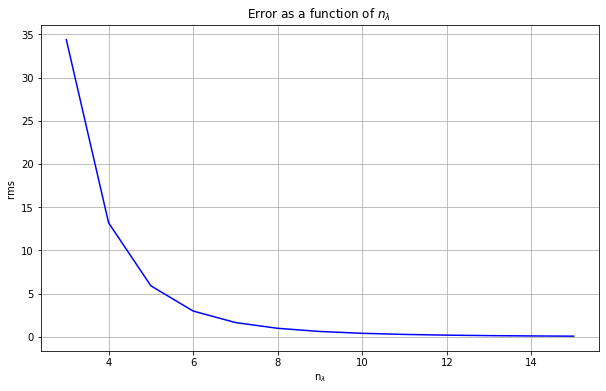

In [7]:
plt.figure(figsize=(10,6))
plt.plot(na,err, ls='-', color="blue")
plt.title('Error as a function of $n_\lambda$ ')
plt.xlabel('n$_\lambda$')
plt.ylabel('rms ')
plt.grid()
plt.show()